게시글번호(국내 시도별 발생현황 고유값)   
CREATE_DT 등록일시분초 DEATH_CNT 사망자 수 GUBUN 시도명(한글) GUBUN_CN 시도명(중국어) GUBUN_EN 시도명(영어) INC_DEC 전일대비 증감 수
ISOL_CLEAR_CNT 격리 해제 수 QUR_RATE 10만명당 발생률 STD_DAY 기준일시 UPDATE_DT 수정일시분초 DEF_CNT 확진자 수   
ISOL_ING_CNT 격리중 환자수 OVER_FLOW_CNT 해외유입 수 LOCAL_OCC_CNT 지역발생 수 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md
import matplotlib

In [3]:
df = pd.read_csv('covid_sido.csv',encoding="utf-8", index_col=0)

In [3]:
df.isnull().sum()

createdt           0
deathcnt           0
defcnt             0
gubun             19
gubuncn          293
gubunen          273
incdec            19
isolclearcnt       0
isolingcnt         0
localocccnt       18
overflowcnt      108
qurrate          686
seq              691
stdday           691
updatedt        4676
dtype: int64

In [68]:
len(df)

4700

In [6]:
df=df.drop(['gubunen','gubuncn'], axis=1)

In [7]:
df.describe(include='number')

,deathcnt,incdec,isolclearcnt,seq
count,4700.000000,4681.000000,4700.000000,4009.000000
mean,30.098298,9.458235,1348.405851,3197.094787
std,76.188916,33.584611,3795.549328,1276.699940
min,0.000000,-1.000000,0.000000,916.000000
25%,0.000000,0.000000,40.000000,2074.000000
50%,1.000000,1.000000,134.000000,3190.000000
75%,6.000000,4.000000,647.250000,4325.000000
max,463.000000,518.000000,122282.000000,5346.000000


In [8]:
df_null=df.isnull()

<AxesSubplot:>

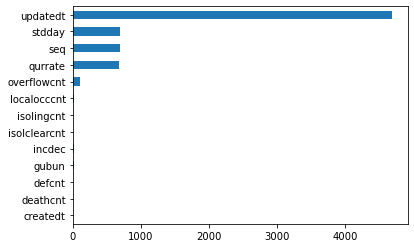

In [9]:
df_null.sum().plot.barh()

In [165]:
df_null.mean() * 100

createdt         0.000000
deathcnt         0.000000
defcnt           0.000000
gubun            0.404255
incdec           0.404255
isolclearcnt     0.000000
isolingcnt       0.000000
localocccnt      0.382979
overflowcnt      2.297872
qurrate         14.595745
seq             14.702128
stdday          14.702128
updatedt        99.489362
dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4700 entries, 0 to 4699
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   createdt      4700 non-null   object 
 1   deathcnt      4700 non-null   int64  
 2   defcnt        4700 non-null   object 
 3   gubun         4681 non-null   object 
 4   incdec        4681 non-null   float64
 5   isolclearcnt  4700 non-null   float64
 6   isolingcnt    4700 non-null   object 
 7   localocccnt   4682 non-null   object 
 8   overflowcnt   4592 non-null   object 
 9   qurrate       4014 non-null   object 
 10  seq           4009 non-null   float64
 11  stdday        4009 non-null   object 
 12  updatedt      24 non-null     object 
dtypes: float64(3), int64(1), object(9)
memory usage: 514.1+ KB


In [11]:
df['createdt']=pd.to_datetime(df['createdt'])

## 수정작업

In [4]:
df=df.loc[(df['overflowcnt'].str.startswith('2020년', na=False) == False) & 
          (df['isolingcnt'].str.startswith('2020년', na=False)  == False) & 
          (df['localocccnt'].str.startswith('2020년', na=False) == False) ]
df


,createdt,deathcnt,defcnt,gubun,gubuncn,gubunen,incdec,isolclearcnt,isolingcnt,localocccnt,overflowcnt,qurrate,seq,stdday,updatedt
0,2020-10-30 09:32:36.376,0,1741,검역,隔離區,Lazaretto,4.0,1463.0,278,0,4,-,5346.0,2020년 10월 30일 00시,NaN
1,2020-10-30 09:32:36.376,0,59,제주,济州,Jeju,0.0,59.0,0,0,0,8.80,5345.0,2020년 10월 30일 00시,NaN
2,2020-10-30 09:32:36.376,0,315,경남,庆南,Gyeongsangnam-do,1.0,299.0,16,0,1,9.37,5344.0,2020년 10월 30일 00시,NaN
3,2020-10-30 09:32:36.376,57,1587,경북,庆北,Gyeongsangbuk-do,0.0,1513.0,17,0,0,59.61,5343.0,2020년 10월 30일 00시,NaN
4,2020-10-30 09:32:36.376,2,185,전남,全南,Jeollanam-do,1.0,174.0,9,1,0,9.92,5342.0,2020년 10월 30일 00시,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,2020-04-09 19:39:46.46,0,84,인천,仁川,Incheon,0.0,31.0,53,0,0,2.84,920.0,2020년 4월 08일 00시,NaN
4005,2020-04-09 19:39:46.46,139,6807,대구,大邱,Daegu,4.0,5106.0,1562,4,0,279.38,919.0,2020년 4월 08일 00시,NaN
4006,2020-04-09 19:39:46.46,3,125,부산,釜山,Busan,0.0,97.0,25,0,0,3.66,918.0,2020년 4월 08일 00시,NaN
4007,2020-04-09 19:39:46.46,2,590,서울,首尔,Seoul,12.0,174.0,414,5,7,6.06,917.0,2020년 4월 08일 00시,NaN


In [5]:
df['overflowcnt']=df['overflowcnt'].astype(int)
df['isolingcnt']=df['isolingcnt'].astype(int)
df['localocccnt']=df['localocccnt'].astype(int)
df['defcnt']=df['defcnt'].astype(int)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4009 entries, 0 to 4008
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   createdt      4009 non-null   object 
 1   deathcnt      4009 non-null   int64  
 2   defcnt        4009 non-null   int32  
 3   gubun         4009 non-null   object 
 4   gubuncn       4009 non-null   object 
 5   gubunen       4009 non-null   object 
 6   incdec        4009 non-null   float64
 7   isolclearcnt  4009 non-null   float64
 8   isolingcnt    4009 non-null   int32  
 9   localocccnt   4009 non-null   int32  
 10  overflowcnt   4009 non-null   int32  
 11  qurrate       4009 non-null   object 
 12  seq           4009 non-null   float64
 13  stdday        4009 non-null   object 
 14  updatedt      24 non-null     object 
dtypes: float64(3), int32(4), int64(1), object(7)
memory usage: 438.5+ KB


In [7]:
df.isnull().sum()

createdt           0
deathcnt           0
defcnt             0
gubun              0
gubuncn            0
gubunen            0
incdec             0
isolclearcnt       0
isolingcnt         0
localocccnt        0
overflowcnt        0
qurrate            0
seq                0
stdday             0
updatedt        3985
dtype: int64

게시글번호(국내 시도별 발생현황 고유값)
CREATE_DT 등록일시분초 DEATH_CNT 사망자 수 GUBUN 시도명(한글) GUBUN_CN 시도명(중국어) GUBUN_EN 시도명(영어) INC_DEC 전일대비 증감 수 ISOL_CLEAR_CNT 격리 해제 수 QUR_RATE 10만명당 발생률 STD_DAY 기준일시 UPDATE_DT 수정일시분초 DEF_CNT 확진자 수
ISOL_ING_CNT 격리중 환자수 OVER_FLOW_CNT 해외유입 수 LOCAL_OCC_CNT 지역발생 수

In [148]:
#df.sort_values(by='createdt')

In [13]:
from datetime import datetime

In [14]:
df2 = df[(df['createdt'] >= datetime(2020, 3, 2)) & (df['createdt'] <= datetime(2020, 3, 31))]
df2.sort_values(by='createdt')

,createdt,deathcnt,defcnt,gubun,incdec,isolclearcnt,isolingcnt,localocccnt,overflowcnt,qurrate,seq,stdday,updatedt
4699,2020-03-02 19:27:57.570,18,합계,NaN,NaN,1.0,2020년 3월 1일 16시,NaN,NaN,NaN,NaN,NaN,NaN
4681,2020-03-02 19:27:57.570,0,검역,NaN,NaN,19.0,2020년 3월 1일 16시,2020-03-03 20:04:50.50,NaN,NaN,NaN,NaN,NaN
4682,2020-03-02 19:27:57.570,0,제주,NaN,NaN,18.0,2020년 3월 1일 16시,NaN,NaN,NaN,NaN,NaN,NaN
4683,2020-03-02 19:27:57.570,0,경남,NaN,NaN,17.0,2020년 3월 1일 16시,NaN,NaN,NaN,NaN,NaN,NaN
4684,2020-03-02 19:27:57.570,8,경북,NaN,NaN,16.0,2020년 3월 1일 16시,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4196,2020-03-30 10:29:47.470,3,118,부산,1.0,87.0,3.46,709,2020년 03월 30일 00시,NaN,NaN,NaN,NaN
4197,2020-03-30 10:29:47.470,0,426,서울,16.0,92.0,4.38,708,2020년 03월 30일 00시,NaN,NaN,NaN,NaN
4198,2020-03-30 10:29:47.470,158,9661,합계,78.0,5228.0,18.63,707,2020년 03월 30일 00시,NaN,NaN,NaN,NaN
4189,2020-03-30 10:29:47.470,5,463,경기,15.0,160.0,3.49,716,2020년 03월 30일 00시,NaN,NaN,NaN,NaN


In [77]:
df2.isnull().sum()

createdt          0
deathcnt          0
defcnt            0
gubun            19
incdec           19
isolclearcnt      0
isolingcnt        0
localocccnt      18
overflowcnt     108
qurrate         515
seq             520
stdday          520
updatedt        520
dtype: int64

In [78]:
df2=df2.loc[df2['gubun'].isnull()== False]
df2.isnull().sum()

createdt          0
deathcnt          0
defcnt            0
gubun             0
incdec            0
isolclearcnt      0
isolingcnt        0
localocccnt       0
overflowcnt      89
qurrate         496
seq             501
stdday          501
updatedt        501
dtype: int64

In [79]:
len(df2)

501

In [15]:
df2=df2.drop(['seq','stdday','updatedt','qurrate'],axis=1)
df2

,createdt,deathcnt,defcnt,gubun,incdec,isolclearcnt,isolingcnt,localocccnt,overflowcnt
4180,2020-03-30 10:29:47.470,0,202,검역,13.0,0.0,-,725,2020년 03월 30일 00시
4181,2020-03-30 10:29:47.470,0,9,제주,1.0,4.0,1.34,724,2020년 03월 30일 00시
4182,2020-03-30 10:29:47.470,0,95,경남,1.0,65.0,2.83,723,2020년 03월 30일 00시
4183,2020-03-30 10:29:47.470,38,1298,경북,11.0,772.0,48.75,722,2020년 03월 30일 00시
4184,2020-03-30 10:29:47.470,0,9,전남,0.0,3.0,0.48,721,2020년 03월 30일 00시
...,...,...,...,...,...,...,...,...,...
4695,2020-03-02 19:27:57.570,0,인천,NaN,NaN,5.0,2020년 3월 1일 16시,NaN,NaN
4696,2020-03-02 19:27:57.570,9,대구,NaN,NaN,4.0,2020년 3월 1일 16시,NaN,NaN
4697,2020-03-02 19:27:57.570,0,부산,NaN,NaN,3.0,2020년 3월 1일 16시,NaN,NaN
4698,2020-03-02 19:27:57.570,0,서울,NaN,NaN,2.0,2020년 3월 1일 16시,NaN,NaN


In [81]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 4180 to 4680
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   createdt      501 non-null    datetime64[ns]
 1   deathcnt      501 non-null    int64         
 2   defcnt        501 non-null    object        
 3   gubun         501 non-null    object        
 4   incdec        501 non-null    float64       
 5   isolclearcnt  501 non-null    float64       
 6   isolingcnt    501 non-null    object        
 7   localocccnt   501 non-null    object        
 8   overflowcnt   412 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 39.1+ KB


In [24]:
df2=df2.loc[df2['gubun'] != 'NaN']

In [25]:
df2

,createdt,deathcnt,defcnt,gubun,incdec,isolclearcnt,isolingcnt,localocccnt,overflowcnt
4180,2020-03-30 10:29:47.470,0,202,검역,13.0,0.0,-,725,2020년 03월 30일 00시
4181,2020-03-30 10:29:47.470,0,9,제주,1.0,4.0,1.34,724,2020년 03월 30일 00시
4182,2020-03-30 10:29:47.470,0,95,경남,1.0,65.0,2.83,723,2020년 03월 30일 00시
4183,2020-03-30 10:29:47.470,38,1298,경북,11.0,772.0,48.75,722,2020년 03월 30일 00시
4184,2020-03-30 10:29:47.470,0,9,전남,0.0,3.0,0.48,721,2020년 03월 30일 00시
...,...,...,...,...,...,...,...,...,...
4695,2020-03-02 19:27:57.570,0,인천,NaN,NaN,5.0,2020년 3월 1일 16시,NaN,NaN
4696,2020-03-02 19:27:57.570,9,대구,NaN,NaN,4.0,2020년 3월 1일 16시,NaN,NaN
4697,2020-03-02 19:27:57.570,0,부산,NaN,NaN,3.0,2020년 3월 1일 16시,NaN,NaN
4698,2020-03-02 19:27:57.570,0,서울,NaN,NaN,2.0,2020년 3월 1일 16시,NaN,NaN


In [54]:
#df3_overflowcnt=df2.loc[df['overflowcnt'].str.startswith('2020년', na=False) == False] 죄다 Nan임
df2=df2.replace('-','NaN')
df2=df2.replace('-\u3000', 'NaN')
df2=df2.replace('\u3000-', 'NaN') 
df2=df2.replace('2020-03-03 20:04:50.50', np.nan)
df3_isolingcnt=df2.loc[df['isolingcnt'].str.startswith('2020년', na=False)  == False]
df3_localocccnt=df2.loc[df['localocccnt'].str.startswith('2020년', na=False) == False]
#df3_overflowcnt.isnull().sum()
#len(df3_overflowcnt)

df3_isolingcnt['isolingcnt'] = df3_isolingcnt['isolingcnt'].astype(float)

C:\Users\Owner\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [60]:

df3_localocccnt['localocccnt']=df3_localocccnt['localocccnt'].replace('NaN',np.nan)
#df3_localocccnt['localocccnt']=df3_localocccnt['localocccnt'].astype(int)
df3_localocccnt['localocccnt']=df3_localocccnt.loc[df3_localocccnt['localocccnt'] != np.nan]
df3_localocccnt['localocccnt']

C:\Users\Owner\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Owner\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


4180    2020-03-30 10:29:47.470000
4181    2020-03-30 10:29:47.470000
4182    2020-03-30 10:29:47.470000
4183    2020-03-30 10:29:47.470000
4184    2020-03-30 10:29:47.470000
                   ...            
4695    2020-03-02 19:27:57.570000
4696    2020-03-02 19:27:57.570000
4697    2020-03-02 19:27:57.570000
4698    2020-03-02 19:27:57.570000
4699    2020-03-02 19:27:57.570000
Name: localocccnt, Length: 430, dtype: object

In [26]:
#df2['defcnt']=df2['defcnt'].astype(int)
#df2['isolingcnt']=df2['isolingcnt'].astype(int)

## 전국 그래프 그리기

In [87]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 4180 to 4699
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   createdt      520 non-null    datetime64[ns]
 1   deathcnt      520 non-null    int64         
 2   defcnt        520 non-null    object        
 3   gubun         501 non-null    object        
 4   incdec        501 non-null    float64       
 5   isolclearcnt  520 non-null    float64       
 6   isolingcnt    520 non-null    object        
 7   localocccnt   502 non-null    object        
 8   overflowcnt   412 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 40.6+ KB


In [62]:
df3_total = df2[df2['gubun'] == '합계']
#df3_total

In [63]:
df['gubun'].unique()

array(['검역', '제주', '경남', '경북', '전남', '전북', '충남', '충북', '강원', '경기', '세종',
       '울산', '대전', '광주', '인천', '대구', '부산', '서울', '합계', nan], dtype=object)

In [64]:
df3_jj = df2[df2['gubun'] == '제주']
df3_kn = df2[df2['gubun'] == '경남']
df3_kb = df2[df2['gubun'] == '경북']
df3_jn = df2[df2['gubun'] == '전남']
df3_jb = df2[df2['gubun'] == '전북']
df3_cn = df2[df2['gubun'] == '충남']
df3_cb = df2[df2['gubun'] == '충북']
df3_kw = df2[df2['gubun'] == '강원']
df3_kk = df2[df2['gubun'] == '경기']
df3_sj = df2[df2['gubun'] == '세종']
df3_us = df2[df2['gubun'] == '울산']
df3_dj = df2[df2['gubun'] == '대전']
df3_kj = df2[df2['gubun'] == '광주']
df3_ic = df2[df2['gubun'] == '인천']
df3_dg = df2[df2['gubun'] == '대구']
df3_bs = df2[df2['gubun'] == '부산']
df3_sl = df2[df2['gubun'] == '서울']

In [65]:
# matplotlib 폰트설정
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='NanumBarunGothic') # For Windows
print(plt.rcParams['font.family'])

['NanumBarunGothic']


In [66]:
df3_dg['deathcnt'].sum()

1683

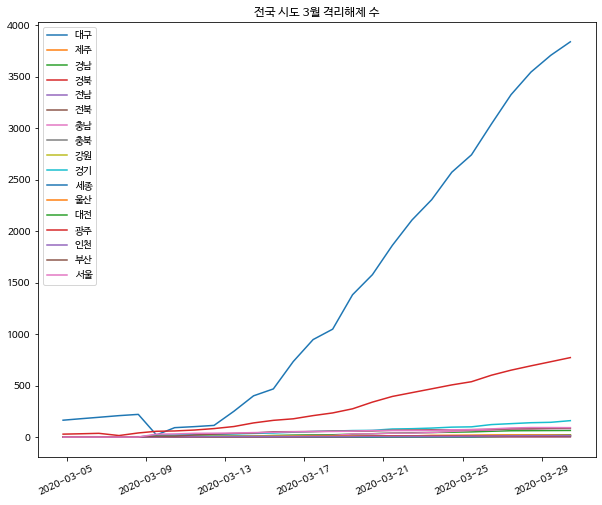

In [69]:
#sns.lmplot(x='createdt', y='deathcnt', hue= 'gubun',data=df2)
gubun=['대구','제주', '경남', '경북', '전남', '전북', '충남', '충북', '강원', '경기', '세종',
       '울산', '대전', '광주', '인천',  '부산', '서울']
plt.figure(figsize=(10,8))
plt.plot(df3_dg['createdt'], df3_dg['isolclearcnt'] ,label=gubun[0])
plt.plot(df3_jj['createdt'], df3_jj['isolclearcnt'] ,label=gubun[1])
plt.plot(df3_kn['createdt'], df3_kn['isolclearcnt'] ,label=gubun[2]) 
plt.plot(df3_kb['createdt'], df3_kb['isolclearcnt'] ,label=gubun[3]) 
plt.plot(df3_jn['createdt'], df3_jn['isolclearcnt'] ,label=gubun[4]) 
plt.plot(df3_jb['createdt'], df3_jb['isolclearcnt'] ,label=gubun[5]) 
plt.plot(df3_cn['createdt'], df3_cn['isolclearcnt'] ,label=gubun[6]) 
plt.plot(df3_cb['createdt'], df3_cb['isolclearcnt'] ,label=gubun[7]) 
plt.plot(df3_kw['createdt'], df3_kw['isolclearcnt'] ,label=gubun[8]) 
plt.plot(df3_kk['createdt'], df3_kk['isolclearcnt'] ,label=gubun[9])
plt.plot(df3_sj['createdt'], df3_sj['isolclearcnt'] ,label=gubun[10])
plt.plot(df3_us['createdt'], df3_us['isolclearcnt'] ,label=gubun[11])
plt.plot(df3_dj['createdt'], df3_dj['isolclearcnt'] ,label=gubun[12])
plt.plot(df3_kj['createdt'], df3_kj['isolclearcnt'] ,label=gubun[13])
plt.plot(df3_ic['createdt'], df3_ic['isolclearcnt'] ,label=gubun[14])
plt.plot(df3_bs['createdt'], df3_bs['isolclearcnt'] ,label=gubun[15])
plt.plot(df3_sl['createdt'], df3_sl['isolclearcnt'] ,label=gubun[16])


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax = plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)
plt.xticks(rotation=25)
ax.legend()
plt.title('전국 시도 3월 격리해제 수')
plt.show()


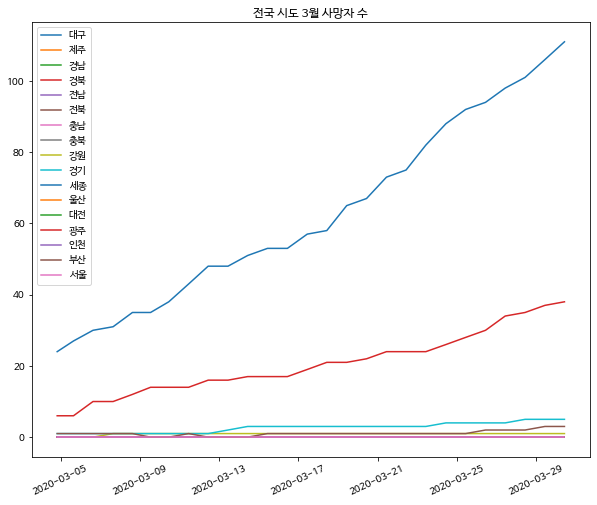

In [70]:
gubun=['대구','제주', '경남', '경북', '전남', '전북', '충남', '충북', '강원', '경기', '세종',
       '울산', '대전', '광주', '인천',  '부산', '서울']
plt.figure(figsize=(10,8))
plt.plot(df3_dg['createdt'], df3_dg['deathcnt'] ,label=gubun[0])
plt.plot(df3_jj['createdt'], df3_jj['deathcnt'] ,label=gubun[1])
plt.plot(df3_kn['createdt'], df3_kn['deathcnt'] ,label=gubun[2]) 
plt.plot(df3_kb['createdt'], df3_kb['deathcnt'] ,label=gubun[3]) 
plt.plot(df3_jn['createdt'], df3_jn['deathcnt'] ,label=gubun[4]) 
plt.plot(df3_jb['createdt'], df3_jb['deathcnt'] ,label=gubun[5]) 
plt.plot(df3_cn['createdt'], df3_cn['deathcnt'] ,label=gubun[6]) 
plt.plot(df3_cb['createdt'], df3_cb['deathcnt'] ,label=gubun[7]) 
plt.plot(df3_kw['createdt'], df3_kw['deathcnt'] ,label=gubun[8]) 
plt.plot(df3_kk['createdt'], df3_kk['deathcnt'] ,label=gubun[9])
plt.plot(df3_sj['createdt'], df3_sj['deathcnt'] ,label=gubun[10])
plt.plot(df3_us['createdt'], df3_us['deathcnt'] ,label=gubun[11])
plt.plot(df3_dj['createdt'], df3_dj['deathcnt'] ,label=gubun[12])
plt.plot(df3_kj['createdt'], df3_kj['deathcnt'] ,label=gubun[13])
plt.plot(df3_ic['createdt'], df3_ic['deathcnt'] ,label=gubun[14])
plt.plot(df3_bs['createdt'], df3_bs['deathcnt'] ,label=gubun[15])
plt.plot(df3_sl['createdt'], df3_sl['deathcnt'] ,label=gubun[16])


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax = plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)
plt.xticks(rotation=25)
ax.legend()
plt.title('전국 시도 3월 사망자 수')
plt.show()


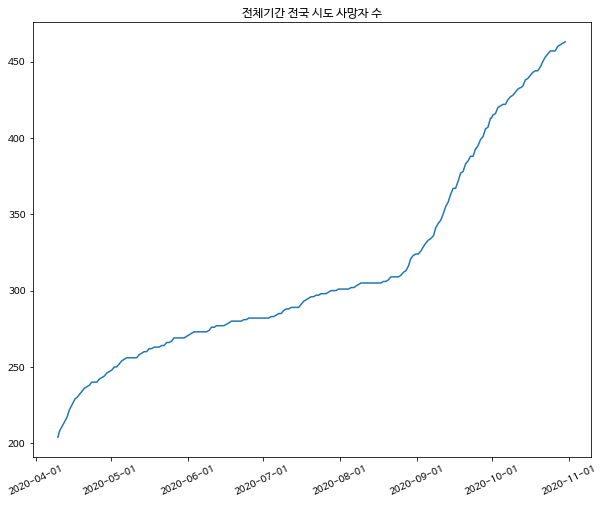

In [100]:
plt.figure(figsize=(10,8))
plt.plot(df_total['createdt'], df_total['deathcnt'])

ax = plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)
plt.xticks(rotation=25)
plt.title('전체기간 전국 시도 사망자 수')
plt.show()


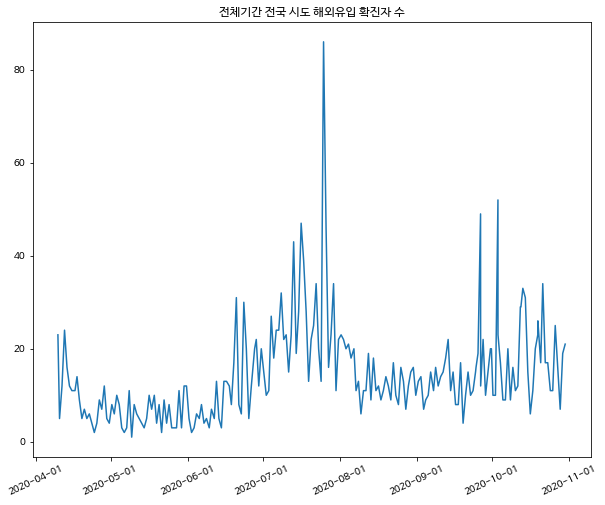

In [103]:
plt.figure(figsize=(10,8))
plt.plot(df_total['createdt'], df_total['overflowcnt'])

ax = plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)
plt.xticks(rotation=25)
plt.title('전체기간 전국 시도 해외유입 확진자 수')
plt.show()


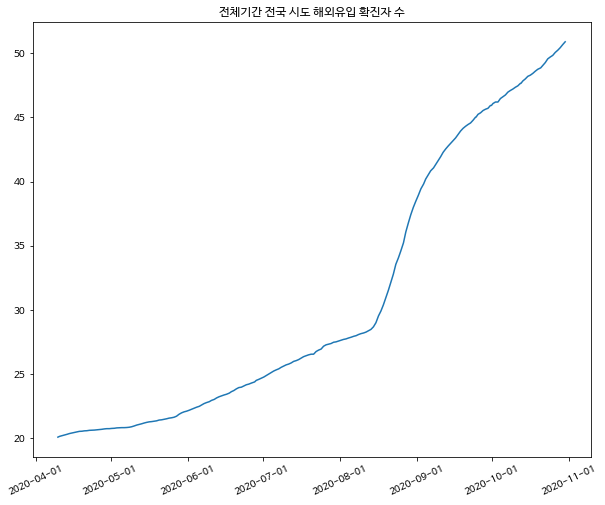

In [104]:
plt.figure(figsize=(10,8))
plt.plot(df_total['createdt'], df_total['qurrate'])

ax = plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)
plt.xticks(rotation=25)
plt.title('전체기간 전국 시도 해외유입 확진자 수')
plt.show()

### 수정 작업 이후의 그래프

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4009 entries, 0 to 4008
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   createdt      4009 non-null   datetime64[ns]
 1   deathcnt      4009 non-null   int64         
 2   defcnt        4009 non-null   int32         
 3   gubun         4009 non-null   object        
 4   incdec        4009 non-null   float64       
 5   isolclearcnt  4009 non-null   float64       
 6   isolingcnt    4009 non-null   int32         
 7   localocccnt   4009 non-null   int32         
 8   overflowcnt   4009 non-null   int32         
 9   qurrate       4009 non-null   object        
 10  seq           4009 non-null   float64       
 11  stdday        4009 non-null   object        
 12  updatedt      24 non-null     object        
dtypes: datetime64[ns](1), float64(3), int32(4), int64(1), object(4)
memory usage: 375.8+ KB


In [93]:
df.head()

,createdt,deathcnt,defcnt,gubun,incdec,isolclearcnt,isolingcnt,localocccnt,overflowcnt,qurrate,seq,stdday,updatedt
0,2020-10-30 09:32:36.376,0,1741,검역,4.0,1463.0,278,0,4,-,5346.0,2020년 10월 30일 00시,NaN
1,2020-10-30 09:32:36.376,0,59,제주,0.0,59.0,0,0,0,8.80,5345.0,2020년 10월 30일 00시,NaN
2,2020-10-30 09:32:36.376,0,315,경남,1.0,299.0,16,0,1,9.37,5344.0,2020년 10월 30일 00시,NaN
3,2020-10-30 09:32:36.376,57,1587,경북,0.0,1513.0,17,0,0,59.61,5343.0,2020년 10월 30일 00시,NaN
4,2020-10-30 09:32:36.376,2,185,전남,1.0,174.0,9,1,0,9.92,5342.0,2020년 10월 30일 00시,NaN


In [94]:
df['qurrate'] = df['qurrate'].replace('-','NaN')
df['qurrate'] = df['qurrate'].astype(float)


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4009 entries, 0 to 4008
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   createdt      4009 non-null   datetime64[ns]
 1   deathcnt      4009 non-null   int64         
 2   defcnt        4009 non-null   int32         
 3   gubun         4009 non-null   object        
 4   incdec        4009 non-null   float64       
 5   isolclearcnt  4009 non-null   float64       
 6   isolingcnt    4009 non-null   int32         
 7   localocccnt   4009 non-null   int32         
 8   overflowcnt   4009 non-null   int32         
 9   qurrate       3798 non-null   float64       
 10  seq           4009 non-null   float64       
 11  stdday        4009 non-null   object        
 12  updatedt      24 non-null     object        
dtypes: datetime64[ns](1), float64(4), int32(4), int64(1), object(3)
memory usage: 375.8+ KB


In [81]:
df_total = df[df['gubun'] == '합계']
df_total

,createdt,deathcnt,defcnt,gubun,incdec,isolclearcnt,isolingcnt,localocccnt,overflowcnt,qurrate,seq,stdday,updatedt
18,2020-10-30 09:32:36.374,463,26385,합계,114.0,24227.0,1695,93,21,50.89,5328.0,2020년 10월 30일 00시,NaN
37,2020-10-29 09:38:17.569,462,26271,합계,125.0,24168.0,1641,106,19,50.67,5309.0,2020년 10월 29일 00시,NaN
56,2020-10-28 09:36:33.948,461,26146,합계,103.0,24073.0,1612,96,7,50.43,5290.0,2020년 10월 28일 00시,NaN
75,2020-10-27 09:38:57.194,460,26043,합계,88.0,23981.0,1602,72,16,50.23,5271.0,2020년 10월 27일 00시,NaN
94,2020-10-26 09:37:29.639,457,25955,합계,119.0,23905.0,1593,94,25,50.06,5252.0,2020년 10월 26일 00시,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3932,2020-04-13 11:11:18.180,217,10537,합계,25.0,7447.0,2873,9,16,20.32,1110.0,2020년 04월 13일 00시,NaN
3951,2020-04-12 11:26:08.080,214,10512,합계,32.0,7368.0,2930,8,24,20.27,1091.0,2020년 4월 12일 00시,NaN
3970,2020-04-11 11:04:48.480,211,10480,합계,30.0,7243.0,3026,18,12,20.21,1015.0,2020년 04월 11일 00시,NaN
3989,2020-04-10 11:17:35.350,208,10450,합계,27.0,7117.0,3125,22,5,20.16,996.0,2020년 04월 10일 00시,NaN


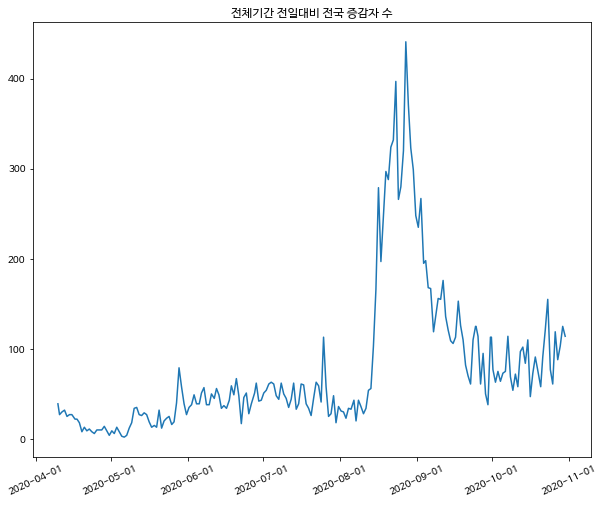

In [101]:
plt.figure(figsize=(10,8))
df_total = df[df['gubun'] == '합계']
plt.plot(df_total['createdt'], df_total['incdec'])

ax = plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)
plt.xticks(rotation=25)
plt.title('전체기간 전일대비 전국 증감자 수')
plt.show()


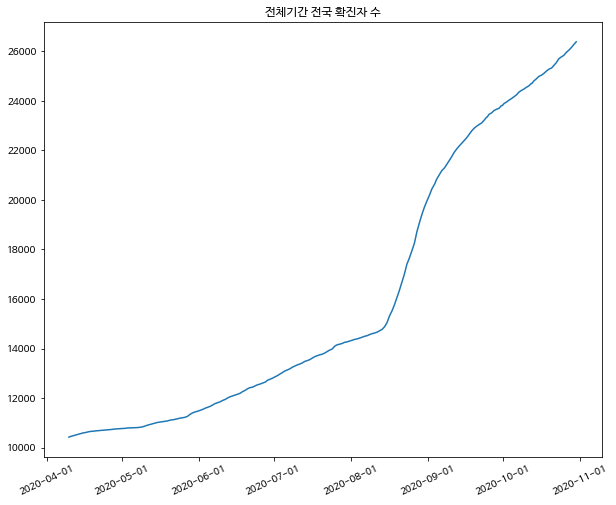

In [102]:
plt.figure(figsize=(10,8))
df_total = df[df['gubun'] == '합계']
plt.plot(df_total['createdt'], df_total['defcnt'])

ax = plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)
plt.xticks(rotation=25)
plt.title('전체기간 전국 확진자 수')
plt.show()

In [83]:
df_jj = df[df['gubun'] == '제주']
df_kn = df[df['gubun'] == '경남']
df_kb = df[df['gubun'] == '경북']
df_jn = df[df['gubun'] == '전남']
df_jb = df[df['gubun'] == '전북']
df_cn = df[df['gubun'] == '충남']
df_cb = df[df['gubun'] == '충북']
df_kw = df[df['gubun'] == '강원']
df_kk = df[df['gubun'] == '경기']
df_sj = df[df['gubun'] == '세종']
df_us = df[df['gubun'] == '울산']
df_dj = df[df['gubun'] == '대전']
df_kj = df[df['gubun'] == '광주']
df_ic = df[df['gubun'] == '인천']
df_dg = df[df['gubun'] == '대구']
df_bs = df[df['gubun'] == '부산']
df_sl = df[df['gubun'] == '서울']

In [99]:
gubun=['대구','제주', '경남', '경북', '전남', '전북', '충남', '충북', '강원', '경기', '세종',
       '울산', '대전', '광주', '인천',  '부산', '서울']
plt.figure(figsize=(10,8))
plt.plot(df_dg['createdt'], df_dg['qurrate'] ,label=gubun[0])
plt.plot(df_jj['createdt'], df_jj['qurrate'] ,label=gubun[1])
plt.plot(df_kn['createdt'], df_kn['qurrate'] ,label=gubun[2]) 
plt.plot(df_kb['createdt'], df_kb['qurrate'] ,label=gubun[3]) 
plt.plot(df_jn['createdt'], df_jn['qurrate'] ,label=gubun[4]) 
plt.plot(df_jb['createdt'], df_jb['qurrate'] ,label=gubun[5]) 
plt.plot(df_cn['createdt'], df_cn['qurrate'] ,label=gubun[6]) 
plt.plot(df_cb['createdt'], df_cb['qurrate'] ,label=gubun[7]) 
plt.plot(df_kw['createdt'], df_kw['qurrate'] ,label=gubun[8]) 
plt.plot(df_kk['createdt'], df_kk['qurrate'] ,label=gubun[9])
plt.plot(df_sj['createdt'], df_sj['qurrate'] ,label=gubun[10])
plt.plot(df_us['createdt'], df_us['qurrate'] ,label=gubun[11])
plt.plot(df_dj['createdt'], df_dj['qurrate'] ,label=gubun[12])
plt.plot(df_kj['createdt'], df_kj['qurrate'] ,label=gubun[13])
plt.plot(df_ic['createdt'], df_ic['qurrate'] ,label=gubun[14])
plt.plot(df_bs['createdt'], df_bs['qurrate'] ,label=gubun[15])
plt.plot(df_sl['createdt'], df_sl['qurrate'] ,label=gubun[16])


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax = plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)
plt.xticks(rotation=25)
ax.legend()
plt.title('전국 시도 10만명당 발생률')
plt.show()

KeyboardInterrupt: 

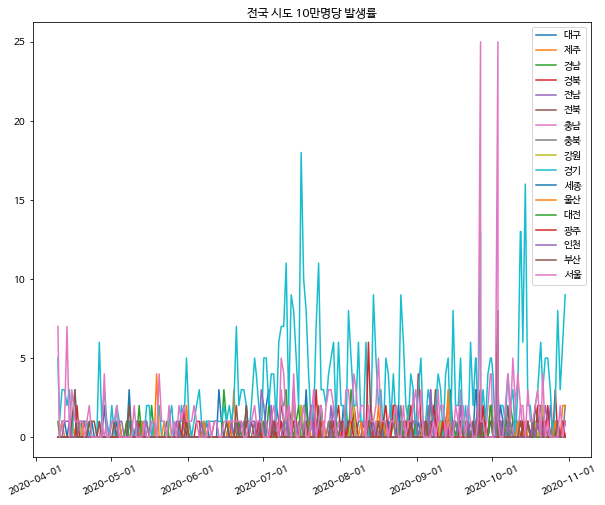

In [98]:
gubun=['대구','제주', '경남', '경북', '전남', '전북', '충남', '충북', '강원', '경기', '세종',
       '울산', '대전', '광주', '인천',  '부산', '서울']
plt.figure(figsize=(10,8))
x='overflowcnt'
plt.plot(df_dg['createdt'], df_dg[x] ,label=gubun[0])
plt.plot(df_jj['createdt'], df_jj[x] ,label=gubun[1])
plt.plot(df_kn['createdt'], df_kn[x] ,label=gubun[2]) 
plt.plot(df_kb['createdt'], df_kb[x] ,label=gubun[3]) 
plt.plot(df_jn['createdt'], df_jn[x] ,label=gubun[4]) 
plt.plot(df_jb['createdt'], df_jb[x] ,label=gubun[5]) 
plt.plot(df_cn['createdt'], df_cn[x] ,label=gubun[6]) 
plt.plot(df_cb['createdt'], df_cb[x] ,label=gubun[7]) 
plt.plot(df_kw['createdt'], df_kw[x] ,label=gubun[8]) 
plt.plot(df_kk['createdt'], df_kk[x] ,label=gubun[9])
plt.plot(df_sj['createdt'], df_sj[x] ,label=gubun[10])
plt.plot(df_us['createdt'], df_us[x] ,label=gubun[11])
plt.plot(df_dj['createdt'], df_dj[x] ,label=gubun[12])
plt.plot(df_kj['createdt'], df_kj[x] ,label=gubun[13])
plt.plot(df_ic['createdt'], df_ic[x] ,label=gubun[14])
plt.plot(df_bs['createdt'], df_bs[x] ,label=gubun[15])
plt.plot(df_sl['createdt'], df_sl[x] ,label=gubun[16])


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax = plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)
plt.xticks(rotation=25)
ax.legend()
plt.title('전국 시도 10만명당 발생률')
plt.show()

<AxesSubplot:>

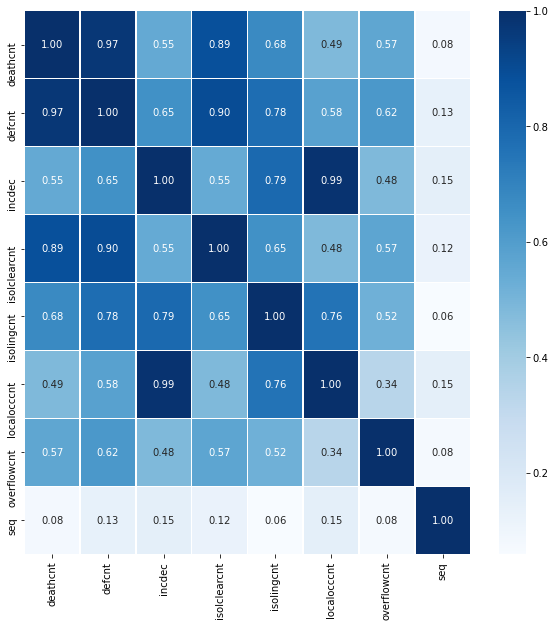

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(data = df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

cut datetime 함수 만들기 (달별로 cut)
전국 시도별 그래프 만들어주는 함수 만들기

CREATE_DT 등록일시분초 DEATH_CNT 사망자 수 GUBUN 시도명(한글) GUBUN_CN 시도명(중국어) GUBUN_EN 시도명(영어) INC_DEC 전일대비 증감 수 ISOL_CLEAR_CNT 격리 해제 수 QUR_RATE 10만명당 발생률 STD_DAY 기준일시 UPDATE_DT 수정일시분초 DEF_CNT 확진자 수
ISOL_ING_CNT 격리중 환자수 OVER_FLOW_CNT 해외유입 수 LOCAL_OCC_CNT 지역발생 수   

2020년 3월~4월 10일 해외유입 수 확인불가
월별로 datetime 자르면서 그래프를 만들고, 자동으로 데이터 전처리 -> concat?
문제 -> 